In [58]:
# Import python libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn
from sklearn import preprocessing # for label encoder
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import warnings; warnings.simplefilter('ignore')

In [2]:
# target = site_eui
dtrain = pd.read_csv("./data/widsdatathon2022/train.csv")
dtrain

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.500000,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.500000,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.500000,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.500000,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.500000,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75752,6,State_11,Commercial,Office_Uncategorized,20410.0,1995.0,8.0,36.6,28,43.451613,...,25,3,0,0,NaN,NaN,NaN,NaN,132.918411,75752
75753,6,State_11,Residential,5plus_Unit_Building,40489.0,1910.0,98.0,36.6,28,43.451613,...,25,3,0,0,NaN,NaN,NaN,NaN,39.483672,75753
75754,6,State_11,Commercial,Commercial_Other,28072.0,1917.0,NaN,36.6,26,36.612903,...,6,0,0,0,NaN,NaN,NaN,NaN,48.404398,75754
75755,6,State_11,Commercial,Commercial_Other,53575.0,2012.0,NaN,36.6,26,36.612903,...,6,0,0,0,NaN,NaN,NaN,NaN,592.022750,75755


## Plot relations between numerical features

In [62]:
num_features = dtrain.select_dtypes(include=['float64']).columns.values
dtrain_num = dtrain[num_features]

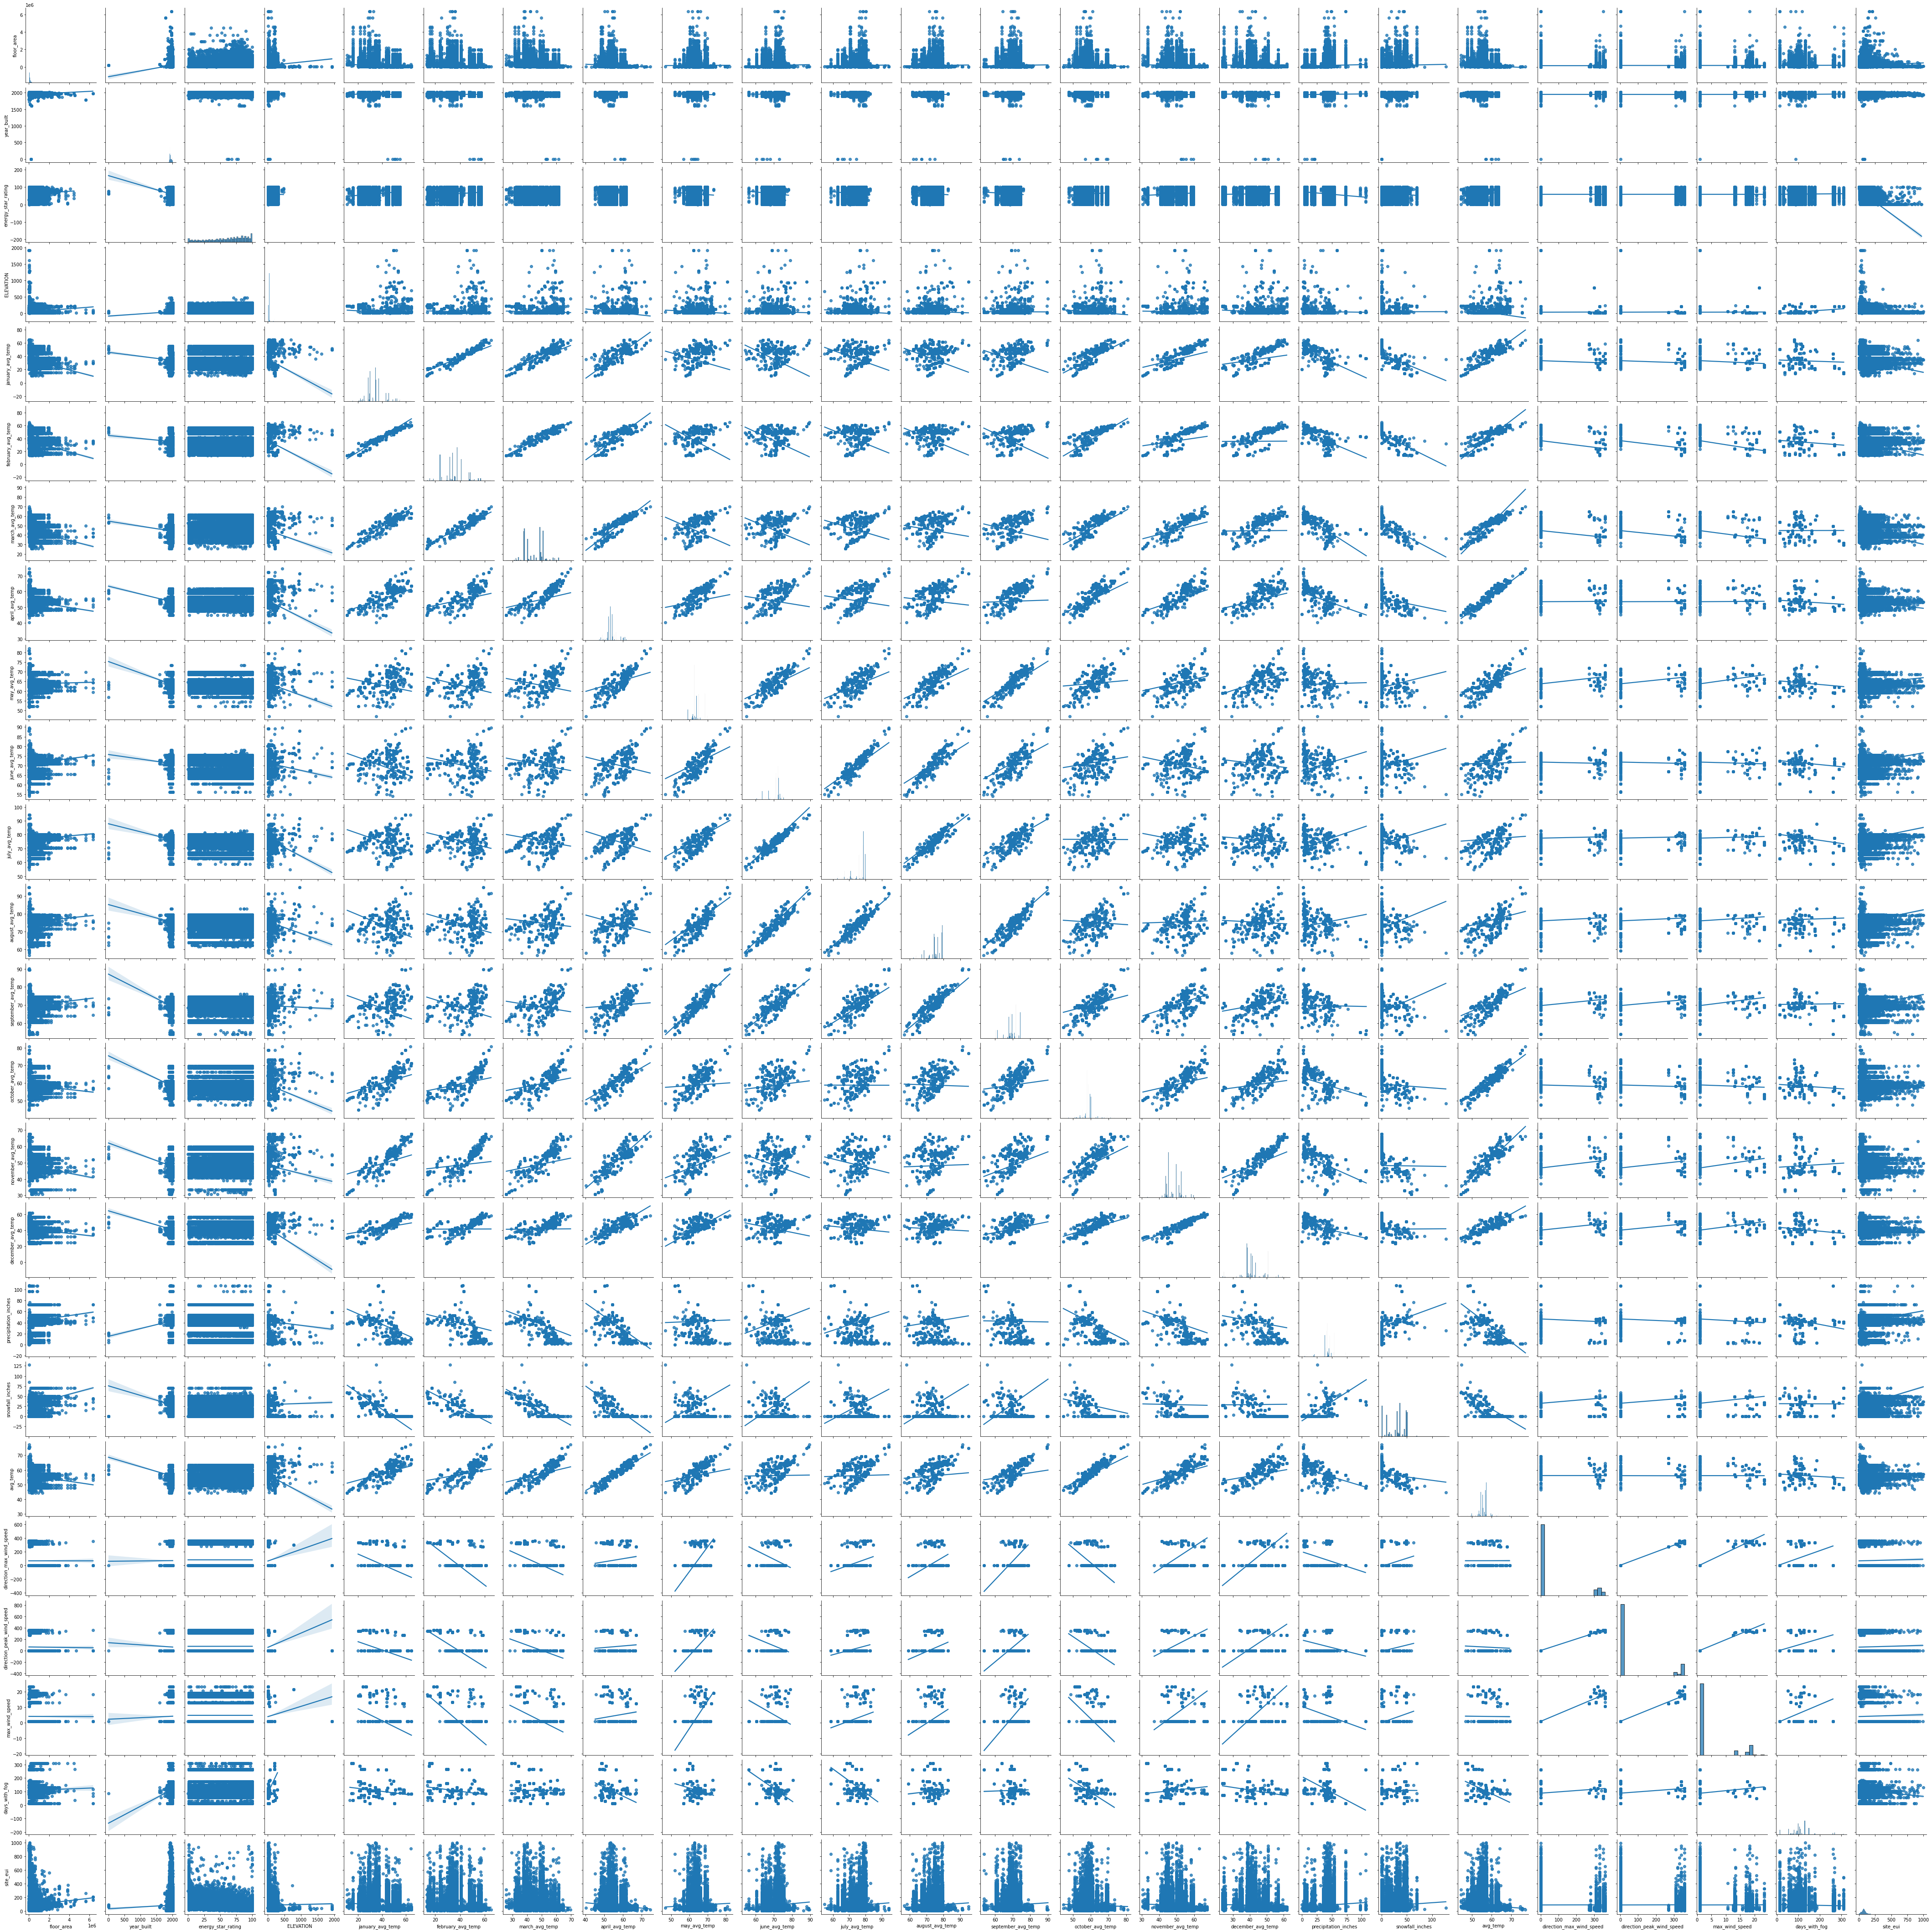

In [63]:
seaborn.pairplot(dtrain_num,dropna=True,kind="reg")

In [9]:
dtest = pd.read_csv("./data/widsdatathon2022/test.csv")
dtest

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,id
0,7,State_1,Commercial,Grocery_store_or_food_market,28484.0,1994.0,37.0,2.4,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75757
1,7,State_1,Commercial,Grocery_store_or_food_market,21906.0,1961.0,55.0,45.7,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75758
2,7,State_1,Commercial,Grocery_store_or_food_market,16138.0,1950.0,1.0,59.1,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75759
3,7,State_1,Commercial,Grocery_store_or_food_market,97422.0,1971.0,34.0,35.4,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75760
4,7,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,35.0,1.8,38,50.596774,...,0,29,5,2,0,340.0,330.0,22.8,126.0,75761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9700,7,State_11,Residential,5plus_Unit_Building,305925.0,2013.0,99.0,812.0,21,38.661290,...,0,39,3,0,0,NaN,NaN,NaN,NaN,85457
9701,7,State_11,Residential,5plus_Unit_Building,34909.0,1910.0,94.0,26.5,21,38.661290,...,0,39,3,0,0,NaN,NaN,NaN,NaN,85458
9702,7,State_11,Residential,5plus_Unit_Building,42393.0,2014.0,94.0,812.0,21,38.661290,...,0,39,3,0,0,NaN,NaN,NaN,NaN,85459
9703,7,State_11,Residential,5plus_Unit_Building,25368.0,1992.0,79.0,812.0,21,38.661290,...,0,39,3,0,0,NaN,NaN,NaN,NaN,85460


## Identify Missing features

In [30]:
# Null data percentage in features for training data
null_count_train = dtrain.isnull().sum()
null_count_train_percent = (null_count_train/len(dtrain))*100
null_count_train_percent2 = null_count_train_percent[null_count_train_percent > 0]
# Null data percentage in features for test data
null_count_test = dtest.isnull().sum()
null_count_test_percent = (null_count_test/len(dtest))*100
null_count_test_percent2 = null_count_test_percent[null_count_test_percent > 0]
#
per_df = pd.concat([null_count_train_percent2, null_count_test_percent2], axis=1)
per_df.columns = ["trainig_Null_per","test_Null_per"]
per_df

,trainig_Null_per,test_Null_per
year_built,2.424858,0.947965
energy_star_rating,35.256148,23.225142
direction_max_wind_speed,54.228652,88.356517
direction_peak_wind_speed,55.190939,88.356517
max_wind_speed,54.228652,88.356517
days_with_fog,60.451179,93.941267


## Data filtering and imputation

In [41]:
# Removing features that have over 50% missing values in the train, and test data sets

train = dtrain.drop(['direction_max_wind_speed','direction_peak_wind_speed','max_wind_speed','days_with_fog','id'], axis=1)
test = dtest.drop(['direction_max_wind_speed','direction_peak_wind_speed','max_wind_speed','days_with_fog','id'], axis=1)

In [42]:
# Missing value imputation

# replace with mode year
train['year_built'] = train['year_built'].replace(np.nan, 2000)
# replacing rest of the values with mean
train['energy_star_rating'] = train['energy_star_rating'].replace(np.nan,train['energy_star_rating'].mean())

# replace with mode year
test['year_built'] = test['year_built'].replace(np.nan, 2000)
# replacing rest of the values with mean
test['energy_star_rating'] = test['energy_star_rating'].replace(np.nan,test['energy_star_rating'].mean())


In [43]:
# Label encoding
le = preprocessing.LabelEncoder()
train['State_Factor']= le.fit_transform(train['State_Factor']).astype("uint8")
train['building_class']= le.fit_transform(train['building_class']).astype("uint8")
train['facility_type']= le.fit_transform(train['facility_type']).astype("uint8")


test['State_Factor']= le.fit_transform(test['State_Factor']).astype("uint8")
test['building_class']= le.fit_transform(test['building_class']).astype("uint8")
test['facility_type']= le.fit_transform(test['facility_type']).astype("uint8")

In [44]:
train.shape, test.shape

((75757, 59), (9705, 58))

In [50]:
train.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,site_eui
0,1,0,0,13,61242.0,1942.0,11.0,2.4,36,50.5,...,56.972603,0,0,0,0,14,0,0,0,248.682615
1,1,0,0,55,274000.0,1955.0,45.0,1.8,36,50.5,...,56.972603,0,0,0,0,14,0,0,0,26.500150
2,1,0,0,48,280025.0,1951.0,97.0,1.8,36,50.5,...,56.972603,0,0,0,0,14,0,0,0,24.693619
3,1,0,0,6,55325.0,1980.0,46.0,1.8,36,50.5,...,56.972603,0,0,0,0,14,0,0,0,48.406926
4,1,0,0,56,66000.0,1985.0,100.0,2.4,36,50.5,...,56.972603,0,0,0,0,14,0,0,0,3.899395


In [46]:
test.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F
0,7,0,0,13,28484.0,1994.0,37.0,2.4,38,50.596774,...,0,59.894521,0,0,0,0,29,5,2,0
1,7,0,0,13,21906.0,1961.0,55.0,45.7,38,50.596774,...,0,59.894521,0,0,0,0,29,5,2,0
2,7,0,0,13,16138.0,1950.0,1.0,59.1,38,50.596774,...,0,59.894521,0,0,0,0,29,5,2,0
3,7,0,0,13,97422.0,1971.0,34.0,35.4,38,50.596774,...,0,59.894521,0,0,0,0,29,5,2,0
4,7,0,0,13,61242.0,1942.0,35.0,1.8,38,50.596774,...,0,59.894521,0,0,0,0,29,5,2,0


In [47]:
target = train['site_eui']
target

0        248.682615
1         26.500150
2         24.693619
3         48.406926
4          3.899395
            ...    
75752    132.918411
75753     39.483672
75754     48.404398
75755    592.022750
75756     29.154684
Name: site_eui, Length: 75757, dtype: float64

In [52]:
train_df = train.drop("site_eui",axis=1)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(train_df, target, test_size=0.2, random_state=123)

In [56]:
def xgboost_tuning_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=2, scoring_fit='neg_mean_squared_error',
                       do_probabilities = False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=4
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    
    if do_probabilities:
      pred = fitted_model.predict_proba(X_test_data)
    else:
      pred = fitted_model.predict(X_test_data)
    
    return fitted_model, pred

In [59]:
model = xgb.XGBRegressor()
param_grid = {
    'learning_rate':[0.01,0.1,0.05],
    'n_estimators': [500,1000,2000],
    #'colsample_bytree': [0.7, 0.8],
    'max_depth': [2,3,5],
    #'reg_alpha': [1.1, 1.2, 1.3],
    #'reg_lambda': [1.1, 1.2, 1.3],
    'subsample': [0.7, 0.8]
}

model, pred = xgboost_tuning_pipeline(X_train, X_test, y_train, y_test, model, 
                                     param_grid, cv=2)

# Root Mean Squared Error
print(np.sqrt(-model.best_score_))
print(model.best_params_)

Fitting 2 folds for each of 54 candidates, totalling 108 fits
42.65897576193727
{'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 2000, 'subsample': 0.8}


/Users/kinali/Desktop/wids-datathon-2022/wids_meric_venv/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/kinali/Desktop/wids-datathon-2022/wids_meric_venv/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/kinali/Desktop/wids-datathon-2022/wids_meric_venv/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/kinali/Desktop/wids-datathon-2022/wids_me

[CV 2/2] END learning_rate=0.01, max_depth=2, n_estimators=1000, subsample=0.7;, score=-2298.061 total time= 1.2min
[CV 1/2] END learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=0.8;, score=-2075.642 total time= 1.9min
[CV 2/2] END learning_rate=0.01, max_depth=5, n_estimators=1000, subsample=0.8;, score=-1976.387 total time= 3.4min
[CV 2/2] END learning_rate=0.1, max_depth=2, n_estimators=2000, subsample=0.7;, score=-2095.866 total time= 2.6min
[CV 2/2] END learning_rate=0.1, max_depth=3, n_estimators=2000, subsample=0.7;, score=-1967.901 total time= 3.7min
[CV 1/2] END learning_rate=0.05, max_depth=2, n_estimators=500, subsample=0.8;, score=-2100.501 total time=  38.3s
[CV 1/2] END learning_rate=0.05, max_depth=2, n_estimators=1000, subsample=0.8;, score=-2063.126 total time= 1.3min
[CV 2/2] END learning_rate=0.05, max_depth=2, n_estimators=2000, subsample=0.8;, score=-2101.579 total time= 2.5min
[CV 1/2] END learning_rate=0.05, max_depth=3, n_estimators=2000, subsample=

/Users/kinali/Desktop/wids-datathon-2022/wids_meric_venv/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/kinali/Desktop/wids-datathon-2022/wids_meric_venv/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/kinali/Desktop/wids-datathon-2022/wids_meric_venv/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/kinali/Desktop/wids-datathon-2022/wids_me

[CV 1/2] END learning_rate=0.01, max_depth=2, n_estimators=1000, subsample=0.8;, score=-2197.576 total time= 1.2min
[CV 1/2] END learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=0.7;, score=-2075.609 total time= 1.9min
[CV 1/2] END learning_rate=0.01, max_depth=5, n_estimators=1000, subsample=0.8;, score=-1902.329 total time= 3.5min
[CV 2/2] END learning_rate=0.1, max_depth=2, n_estimators=2000, subsample=0.8;, score=-2087.434 total time= 2.6min
[CV 2/2] END learning_rate=0.1, max_depth=3, n_estimators=2000, subsample=0.8;, score=-1982.975 total time= 3.7min
[CV 2/2] END learning_rate=0.05, max_depth=2, n_estimators=500, subsample=0.8;, score=-2166.679 total time=  38.0s
[CV 2/2] END learning_rate=0.05, max_depth=2, n_estimators=1000, subsample=0.8;, score=-2132.043 total time= 1.2min
[CV 1/2] END learning_rate=0.05, max_depth=2, n_estimators=2000, subsample=0.8;, score=-2043.254 total time= 2.6min
[CV 2/2] END learning_rate=0.05, max_depth=3, n_estimators=2000, subsample=

/Users/kinali/Desktop/wids-datathon-2022/wids_meric_venv/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/kinali/Desktop/wids-datathon-2022/wids_meric_venv/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/kinali/Desktop/wids-datathon-2022/wids_meric_venv/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/kinali/Desktop/wids-datathon-2022/wids_me

[CV 2/2] END learning_rate=0.01, max_depth=2, n_estimators=500, subsample=0.7;, score=-2484.624 total time=  34.7s
[CV 1/2] END learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.7;, score=-2183.849 total time=  56.0s
[CV 1/2] END learning_rate=0.01, max_depth=3, n_estimators=2000, subsample=0.8;, score=-2008.556 total time= 3.7min
[CV 1/2] END learning_rate=0.1, max_depth=2, n_estimators=500, subsample=0.8;, score=-2058.356 total time=  36.2s
[CV 2/2] END learning_rate=0.1, max_depth=2, n_estimators=1000, subsample=0.8;, score=-2110.064 total time= 1.3min
[CV 1/2] END learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.8;, score=-1959.803 total time=  57.3s
[CV 1/2] END learning_rate=0.1, max_depth=3, n_estimators=1000, subsample=0.8;, score=-1919.435 total time= 1.9min
[CV 1/2] END learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.8;, score=-1796.765 total time= 1.8min
[CV 2/2] END learning_rate=0.1, max_depth=5, n_estimators=2000, subsample=0.8;, sc

/Users/kinali/Desktop/wids-datathon-2022/wids_meric_venv/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/kinali/Desktop/wids-datathon-2022/wids_meric_venv/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/kinali/Desktop/wids-datathon-2022/wids_meric_venv/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/kinali/Desktop/wids-datathon-2022/wids_me

[CV 2/2] END learning_rate=0.01, max_depth=2, n_estimators=500, subsample=0.8;, score=-2473.346 total time=  34.8s
[CV 2/2] END learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.7;, score=-2275.020 total time=  55.3s
[CV 1/2] END learning_rate=0.01, max_depth=3, n_estimators=2000, subsample=0.7;, score=-2011.884 total time= 3.7min
[CV 2/2] END learning_rate=0.1, max_depth=2, n_estimators=500, subsample=0.8;, score=-2132.042 total time=  36.1s
[CV 1/2] END learning_rate=0.1, max_depth=2, n_estimators=1000, subsample=0.8;, score=-2050.596 total time= 1.3min
[CV 2/2] END learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.8;, score=-2022.445 total time=  57.0s
[CV 2/2] END learning_rate=0.1, max_depth=3, n_estimators=1000, subsample=0.8;, score=-1995.071 total time= 1.9min
[CV 2/2] END learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.8;, score=-1923.132 total time= 1.8min
[CV 1/2] END learning_rate=0.1, max_depth=5, n_estimators=2000, subsample=0.8;, sc

/Users/kinali/Desktop/wids-datathon-2022/wids_meric_venv/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/kinali/Desktop/wids-datathon-2022/wids_meric_venv/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/kinali/Desktop/wids-datathon-2022/wids_meric_venv/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/kinali/Desktop/wids-datathon-2022/wids_me

[CV 1/2] END learning_rate=0.01, max_depth=2, n_estimators=2000, subsample=0.8;, score=-2113.208 total time= 2.5min
[CV 1/2] END learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.8;, score=-1996.997 total time= 1.8min
[CV 2/2] END learning_rate=0.01, max_depth=5, n_estimators=2000, subsample=0.8;, score=-1926.086 total time= 7.1min
[CV 2/2] END learning_rate=0.1, max_depth=5, n_estimators=1000, subsample=0.7;, score=-1937.714 total time= 3.6min
[CV 2/2] END learning_rate=0.05, max_depth=3, n_estimators=500, subsample=0.7;, score=-2074.175 total time=  54.9s
[CV 2/2] END learning_rate=0.05, max_depth=3, n_estimators=1000, subsample=0.7;, score=-2023.506 total time= 1.9min
[CV 2/2] END learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.7;, score=-1931.197 total time= 1.6min
[CV 1/2] END learning_rate=0.05, max_depth=5, n_estimators=2000, subsample=0.7;, score=-1779.331 total time= 3.2min
[CV 2/2] END learning_rate=0.01, max_depth=2, n_estimators=2000, subsample=0

/Users/kinali/Desktop/wids-datathon-2022/wids_meric_venv/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/kinali/Desktop/wids-datathon-2022/wids_meric_venv/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/kinali/Desktop/wids-datathon-2022/wids_meric_venv/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/kinali/Desktop/wids-datathon-2022/wids_me

/Users/kinali/Desktop/wids-datathon-2022/wids_meric_venv/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/kinali/Desktop/wids-datathon-2022/wids_meric_venv/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/kinali/Desktop/wids-datathon-2022/wids_meric_venv/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/kinali/Desktop/wids-datathon-2022/wids_me

[CV 1/2] END learning_rate=0.01, max_depth=2, n_estimators=2000, subsample=0.7;, score=-2117.901 total time= 2.5min
[CV 2/2] END learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.8;, score=-2067.122 total time= 1.8min
[CV 1/2] END learning_rate=0.01, max_depth=5, n_estimators=2000, subsample=0.8;, score=-1832.044 total time= 7.2min
[CV 1/2] END learning_rate=0.1, max_depth=5, n_estimators=1000, subsample=0.8;, score=-1787.190 total time= 3.5min
[CV 1/2] END learning_rate=0.05, max_depth=3, n_estimators=500, subsample=0.8;, score=-1993.885 total time=  55.4s
[CV 1/2] END learning_rate=0.05, max_depth=3, n_estimators=1000, subsample=0.8;, score=-1948.451 total time= 1.9min
[CV 1/2] END learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.8;, score=-1820.955 total time= 1.6min
[CV 2/2] END learning_rate=0.05, max_depth=5, n_estimators=2000, subsample=0.8;, score=-1875.944 total time= 3.1min


In [65]:
# Use hyperparameter tuning results for the model
# {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 2000, 'subsample': 0.8}
xg_reg = xgb.XGBRegressor(learning_rate = 0.05, max_depth = 5, n_estimators = 2000,subsample=0.8)
# Fit the regressor to the training set and make predictions on the test set using the familiar .fit() and .predict() methods.
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 38.983053


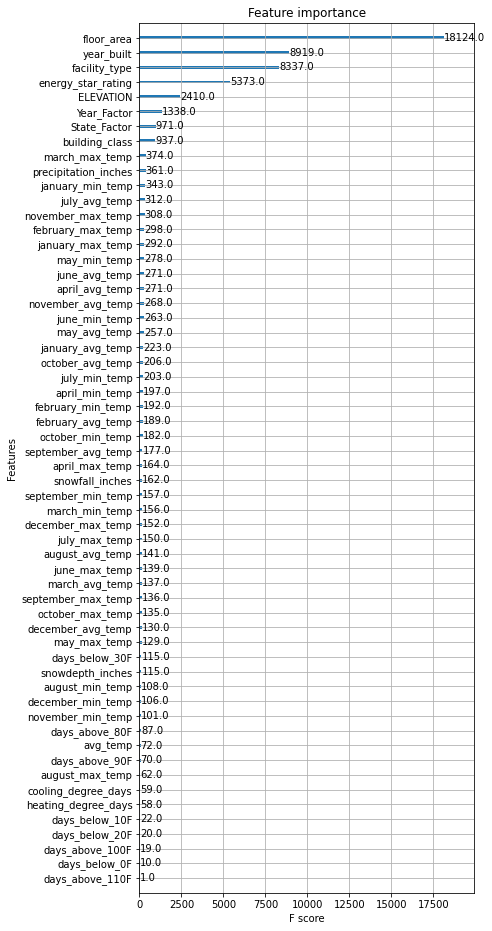

In [75]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [8, 16]
plt.show()